# Dosenbach2007 — Figure 5

This notebook plots distribution of correlations in group-average resting connectome of all subjects in Julia2018 dataset, as seen in Figure 5 of Dosenbach2007.

The original Figure 5 is as follows:

> ![Figure 5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1904171/bin/pnas_0704320104_04320Fig5.jpg)

> Fig. 5. Histogram of the distribution of all 741 r values (0.01 bins). The interregional r values for our set of 39 ROIs were roughly symmetrically distributed around zero, with the preponderance of values occurring in the range from 0.2 to 0.2. This distribution showed a local minimum at 0.2 and a long right-sided tail of r values >0.2.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.signal import find_peaks

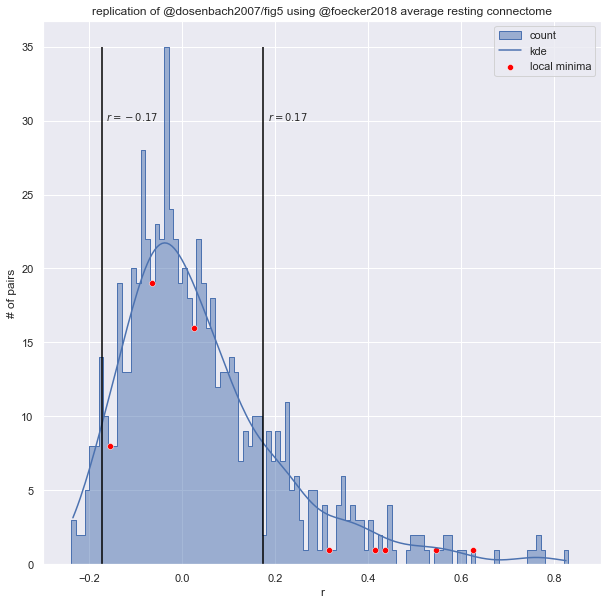

In [25]:
df = pd.read_csv('outputs/julia2018_resting_all_connectome_mean.tsv', index_col=0, sep='\t')

# sns.heatmap(df)


def plot_fig5(df):

  labels = df.columns.to_list()
  conn = df.values

  # Figure 5 (Supplementary Materials)
  conn_vec = conn[np.triu_indices_from(conn, k=1)]  # size=741
  bins = np.arange(-1, 1, 0.01) + 0.05
  bin_indices = np.digitize(conn_vec, bins)


  (unique_bin_indices, counts) = np.unique(bin_indices, return_counts=True)

  peaks, _ = find_peaks(-counts, width=2)
  peak_bin_indices = unique_bin_indices[peaks]
  peaks_x = bins[peak_bin_indices] - 0.005
  peaks_y = counts[peaks]

  plt.figure(figsize=(10,10))

  # plot histogram and KDE
  ax = sns.histplot(x=conn_vec, bins=bins, kde=True, element='step')

  # plot local minima points
  sns.scatterplot(x=peaks_x, y=peaks_y, marker='o', color='red', ax=ax)

  ax.set(xlabel='r',
         ylabel='# of pairs',
         xlim=(-.3, .9),
         title='replication of @dosenbach2007/fig5 using @foecker2018 average resting connectome')

  plt.legend(labels=['count', 'kde', 'local minima'])

  r = np.median(df.values) + df.values.std()
  plt.vlines([-r,r],ymin=0, ymax=max(counts),color='black')
  plt.annotate(f'$r = {r:.2f}$', xy=(r + .01, 30), size=10)
  plt.annotate(f'$r = {-r:.2f}$', xy=(-r + .01, 30), size=10)
  plt.show()
  
plot_fig5(df)


We used $r_t = \text{median(conn) + std(conn)}$ as the threshold, that is one standard deviation from the median of connectivity values (Cohen, 2014, p433).